In [1]:
from scipy.integrate import ode, solve_ivp
import os, sys, time
import numpy as np
import matplotlib.pyplot as plt
import pickle
import bisect

sys.path.append('../')
from simulator_myokit import Simulator
sys.path.append('../../')
import plot_cell

C:\Anaconda3\envs\ml\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Anaconda3\envs\ml\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Anaconda3\envs\ml\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:\n%s" %


D:\Asan\Codes\Electrophysiology\Simulation_with_Myokit\Protocols\trial_steps_ramps_Kernik_200_50_4_-120_60/shortened_trial_steps_ramps_Kernik_200_50_4_-120_60_500_artefact_True_short.pkl
The protocol is 9055.950603217367 ms


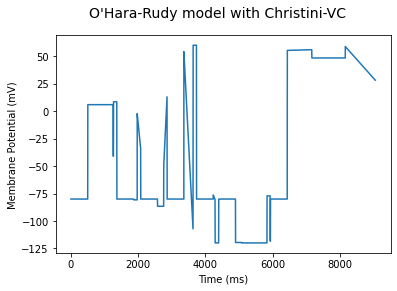

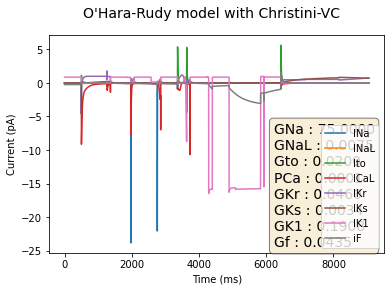

--- 13.752410173416138 seconds ---


In [2]:
sys.path.append('../Protocols')
from protocols import optimized_VC_Christini
'''
O'Hara-Rudy model with Christini-VC
'''
model_path = "../mmt-model-files/newordherg_qNet_VC.mmt" 
sim_params = {
    'cell.mode': 1,         # 'Endocardial' : 0,    'Epicardial' : 1,    'Mid-myocardial' : 2,
    'ina.GNafc' : 1,
    'inal.GNaLfc' : 1,
    'ito.Gtofc' : 1,
    'ical.PCafc' : 1,
    'ikr.GKrfc' : 1,
    'iks.GKsfc' : 1,
    'ik1.GK1fc' : 1,
    'if.Gffc' : 1    
} 
G_li = ['ina.GNa', 'inal.GNaL', 'ito.Gto', 'ical.PCa', 'ikr.GKr', 'iks.GKs', 'ik1.GK1', 'if.Gf']
I_li = ['ina.INa', 'inal.INaL', 'ito.Ito', 'ical.ICaL', 'ikr.IKr', 'iks.IKs', 'ik1.IK1', 'if.iF']   

start_time = time.time()
simulator = Simulator(model_path, optimized_VC_Christini, pre_sim=2) 
simulator.name = "O'Hara-Rudy model with Christini-VC"
Gs = [simulator.model.get(G).value() for G in G_li]
times = np.arange(0, simulator.protocol_total_duration, 1)# np.linspace(0, simulator.total_duration, 20000)  
simulator.set_simulation_params(sim_params)
d = simulator.simulate(times, extra_log=I_li)        
plot_cell.plot_1D( d['engine.time'], d['membrane.V'], title=simulator.name, figsize=(6,4))
textstr = "GNa : %1.4f\nGNaL : %1.4f\nGto : %1.4f\nPCa : %1.4f\nGKr : %1.4f\nGKs : %1.4f\nGK1 : %1.4f\nGf : %1.4f"%(Gs[0], Gs[1], Gs[2], Gs[3], Gs[4], Gs[5], Gs[6], Gs[7])
plot_cell.plot_1D_multi( d['engine.time'], [d[I] for I in I_li], labels=[I.split('.')[1] for I in I_li], title=simulator.name, figsize=(6,4), textstr=textstr)
print("--- %s seconds ---"%(time.time()-start_time))

D:\Asan\Codes\Electrophysiology\Simulation_with_Myokit\Protocols\trial_steps_ramps_Kernik_200_50_4_-120_60/shortened_trial_steps_ramps_Kernik_200_50_4_-120_60_500_artefact_True_short.pkl
The protocol is 9055.950603217367 ms


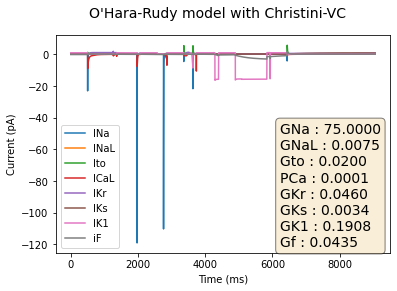

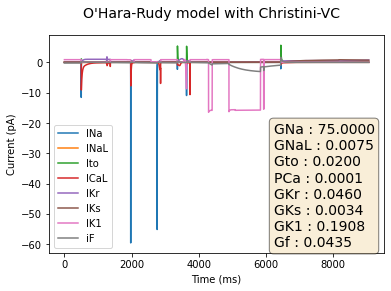

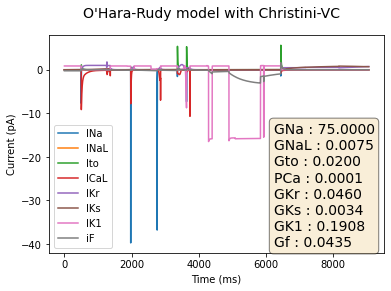

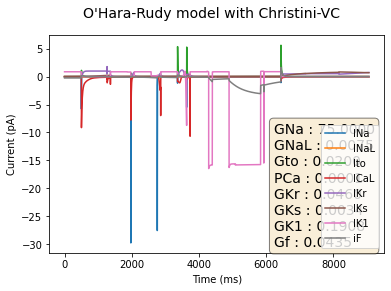

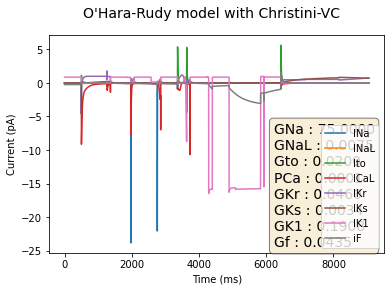

--- 14.860607147216797 seconds ---


In [5]:
sys.path.append('../Protocols')
from protocols import optimized_VC_Christini
'''
O'Hara-Rudy model with Christini-VC
'''
model_path = "../mmt-model-files/newordherg_qNet_VC.mmt" 
 
G_li = ['ina.GNa', 'inal.GNaL', 'ito.Gto', 'ical.PCa', 'ikr.GKr', 'iks.GKs', 'ik1.GK1', 'if.Gf']
I_li = ['ina.INa', 'inal.INaL', 'ito.Ito', 'ical.ICaL', 'ikr.IKr', 'iks.IKs', 'ik1.IK1', 'if.iF']   

start_time = time.time()
simulator = Simulator(model_path, optimized_VC_Christini, pre_sim=2) 
simulator.name = "O'Hara-Rudy model with Christini-VC"
# Gs = [simulator.model.get(G).value() for G in G_li]
times = np.arange(0, simulator.protocol_total_duration, 1)# np.linspace(0, simulator.total_duration, 20000)  
for i in range(1, 6):
    sim_params = {
        'cell.mode': 1,         # 'Endocardial' : 0,    'Epicardial' : 1,    'Mid-myocardial' : 2,
        'ina.GNafc' : i*0.2,
#         'inal.GNaLfc' : 1,
#         'ito.Gtofc' : 1,
#         'ical.PCafc' : 1,
#         'ikr.GKrfc' : 1,
#         'iks.GKsfc' : 1,
#         'ik1.GK1fc' : 1,
#         'if.Gffc' : 1    
    }
    simulator.set_simulation_params(sim_params)
    d = simulator.simulate(times, extra_log=I_li)        
    
    # plot_cell.plot_1D( d['engine.time'], d['membrane.V'], title=simulator.name, figsize=(6,4))
    # textstr = "GNa : %1.4f\nGNaL : %1.4f\nGto : %1.4f\nPCa : %1.4f\nGKr : %1.4f\nGKs : %1.4f\nGK1 : %1.4f\nGf : %1.4f"%(Gs[0], Gs[1], Gs[2], Gs[3], Gs[4], Gs[5], Gs[6], Gs[7])
    plot_cell.plot_1D_multi( d['engine.time'], [d[I] for I in I_li], labels=[I.split('.')[1] for I in I_li], title=simulator.name, figsize=(6,4), textstr=textstr)
print("--- %s seconds ---"%(time.time()-start_time))

0.0 15.4 (7701,)


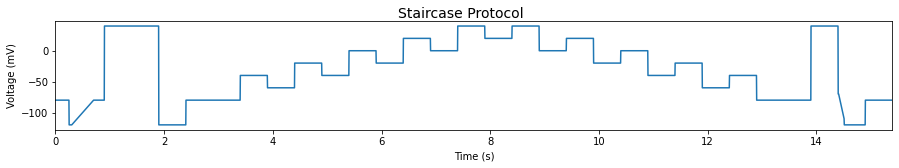

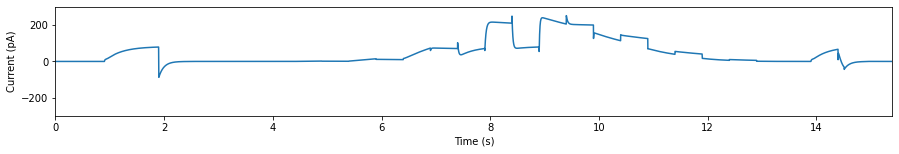

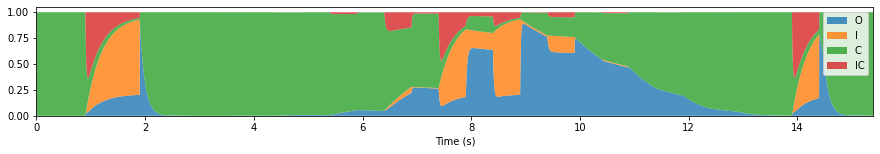

--- 10.509132862091064 seconds ---


In [6]:
sys.path.append('../Protocols')
from protocols import leak_staircase
'''
Kylie 2017 IKr
'''
model_path = "../mmt-model-files/kylie-2017-IKr.mmt" 
start_time = time.time()
simulator = Simulator(model_path, leak_staircase, pre_sim=2) 
simulator.name = "Kylie 2017 IKr"
dt = 0.002
times = np.arange(0, 15.4+dt, dt)
print(times.min(), times.max(), times.shape)

sim_params = {
    'ikr.g' : 3.05762986e+03,         # 'Endocardial' : 0,    'Epicardial' : 1,    'Mid-myocardial' : 2,
    'ikr.p1' : 1.12956276e-01,
    'ikr.p2' : 8.40568507e+01,
    'ikr.p3' : 3.88104629e-01,
    'ikr.p4' : 2.77827575e+01,
    'ikr.p5' : 1.51148201e+00,
    'ikr.p6' : 8.67120219e+01,
    'ikr.p7' : 8.27551811e+01,
    'ikr.p8' : 4.53615892e+01
} 
simulator.set_simulation_params(sim_params)

# simulator.pacing_constant_pre_simulate(-80e-3)
d = simulator.simulate(times, extra_log=['ikr.IKr', 'ikr.open', 'ikr.active'])    
population_by_continent = {
    'O': d['ikr.open']*d['ikr.active'],
    'I': d['ikr.open']*(1-d['ikr.active']),
    'C': (1-d['ikr.open'])*d['ikr.active'],
    'IC': (1-d['ikr.open'])*(1-d['ikr.active']),    
}
plot_cell.plot_1D( d['engine.time'], d['membrane.V']*1000, title='Staircase Protocol', figsize=(15,2), xlabel='Time (s)', ylabel='Voltage (mV)', label=None, xlim=(0, times.max()), ylim=None, save_path=None)
plot_cell.plot_1D( d['engine.time'], d['ikr.IKr'], title=None, figsize=(15,2), xlabel='Time (s)', ylabel='Current (pA)', label=None, xlim=(0, times.max()), ylim=[-300,300], save_path=None)
plot_cell.plot_stack( d['engine.time'], population_by_continent.values(), labels=population_by_continent.keys(), figsize=(15,2), xlabel='Time (s)', xlim=(0, times.max()), save_path=None )
print("--- %s seconds ---"%(time.time()-start_time))

In [7]:
print(d['membrane.V'].shape, d['membrane.V'].std())

(7700,) 0.048668778822216985


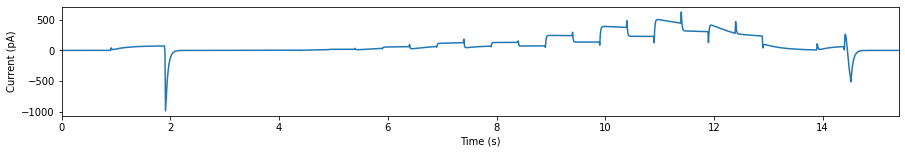

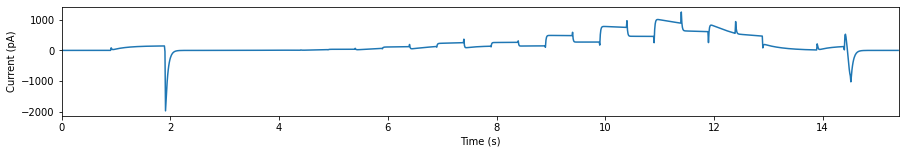

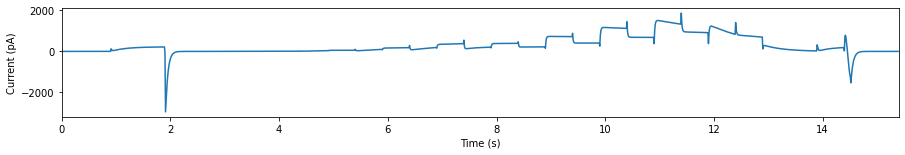

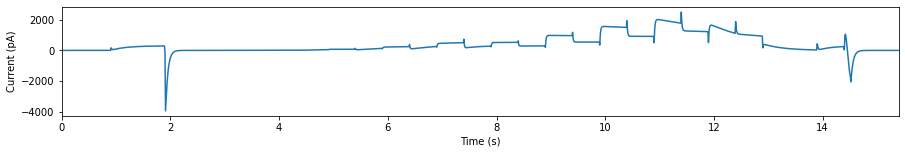

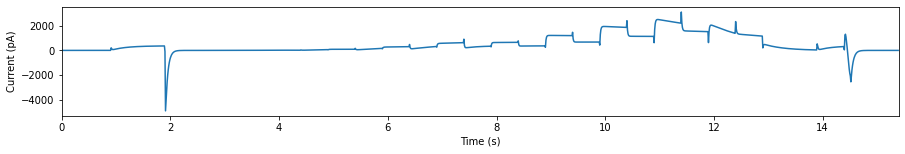

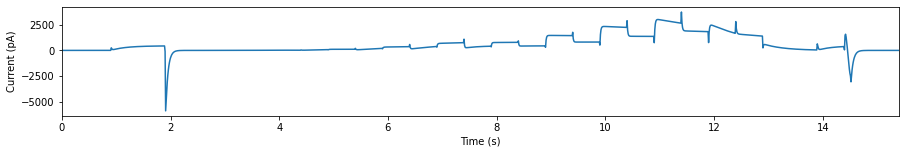

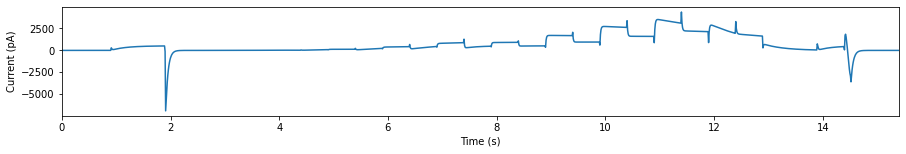

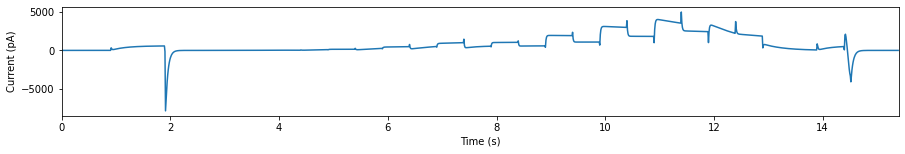

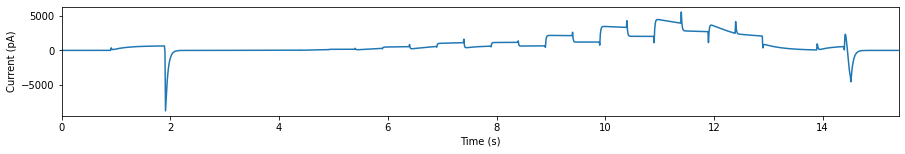

--- 11.436622142791748 seconds ---


In [8]:
sys.path.append('../Protocols')
from protocols import leak_staircase
'''
Kylie 2017 IKr
'''
model_path = "../mmt-model-files/kylie-2017-IKr.mmt" 
start_time = time.time()
simulator = Simulator(model_path, leak_staircase, pre_sim=2) 
simulator.name = "Kylie 2017 IKr"
dt = 0.01
times = np.arange(0, 15.4+dt, dt)

# simulator.pacing_constant_pre_simulate(-80e-3)

for i in np.arange(0.1, 1, 0.1):
    sim_params = {
        'ikr.g': 500000*i,         # 'Endocardial' : 0,    'Epicardial' : 1,    'Mid-myocardial' : 2,
#         'ikr.p1' : 10*i,
#         'ikr.p2' : 100*i,
#         'ikr.p3' : 1,
#         'ikr.p4' : 1,
#         'ikr.p5' : 1,
#         'ikr.p6' : 1,
#         'ikr.p7' : 1,
#         'ikr.p8' : 1    
    } 
    simulator.set_simulation_params(sim_params)
    d = simulator.simulate(times, extra_log=['ikr.IKr', 'ikr.open', 'ikr.active'])    
    population_by_continent = {
        'O': d['ikr.open']*d['ikr.active'],
        'I': d['ikr.open']*(1-d['ikr.active']),
        'C': (1-d['ikr.open'])*d['ikr.active'],
        'IC': (1-d['ikr.open'])*(1-d['ikr.active']),    
    }
#     plot_cell.plot_1D( d['engine.time'], d['membrane.V']*1000, title='Staircase Protocol', figsize=(15,2), xlabel='Time (s)', ylabel='Voltage (mV)', label=None, xlim=(0, times.max()), ylim=None, save_path=None)
    plot_cell.plot_1D( d['engine.time'], d['ikr.IKr'], title=None, figsize=(15,2), xlabel='Time (s)', ylabel='Current (pA)', label=None, xlim=(0, times.max()), save_path=None)
#     plot_cell.plot_stack( d['engine.time'], population_by_continent.values(), labels=population_by_continent.keys(), figsize=(15,2), xlabel='Time (s)', xlim=(0, times.max()), save_path=None )
    
print("--- %s seconds ---"%(time.time()-start_time))

0.06 -0.12
5619.969498181222 -8851.32725178252


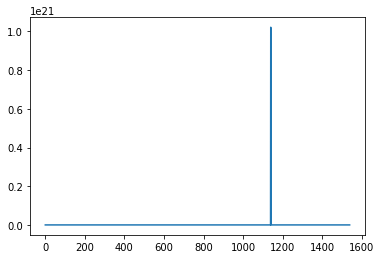

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [9]:
V = d['ikr.IKr']

lower_conductance = 1e2
upper_conductance = 5e5

# change unit...
lower_alpha = 1e-7 * 1e3              # Kylie: 1e-7
upper_alpha = 1e3 * 1e3               # Kylie: 1e3
lower_beta  = 1e-7 * 1e3              # Kylie: 1e-7
upper_beta  = 0.4 * 1e3               # Kylie: 0.4

lower = np.array([
    lower_conductance,
    lower_alpha,
    lower_beta,
    lower_alpha,
    lower_beta,
    lower_alpha,
    lower_beta,
    lower_alpha,
    lower_beta,
])
upper = np.array([
    upper_conductance,
    upper_alpha,
    upper_beta,
    upper_alpha,
    upper_beta,
    upper_alpha,
    upper_beta,
    upper_alpha,
    upper_beta,
])

minf = -float('inf')
rmin = 1.67e-5 * 1e3
rmax = 1000 * 1e3   # Kylie : 1000 * 1e3  |  JK : 600.0
vmin = -120 * 1e-3
vmax = 60 * 1e-3
print(vmax, vmin)
print(V.max(), V.min())
    
for i in range(1):
    a = 0.0004 #np.exp(np.random.uniform(np.log(lower_alpha), np.log(upper_alpha)))
    b = 0.01 # np.random.uniform(lower_beta, upper_beta)
    r = a * np.exp(b * V)
#     print(r)
    plt.plot(r)
    plt.show()
    if r >= rmin and r <= rmax:        
        plt.plot(r)
        plt.show()
    else:
        print("Nooo~~~")

# plt.plot(V)
# plt.show()